In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Importing the dataset
dataset = pd.read_csv('/content/LR (1).csv')
X = dataset.iloc[:, [0,1]].values
y = dataset.iloc[:, 2].values


              Age         Salary   Purchased
count  400.000000     400.000000  400.000000
mean    37.655000   69742.500000    0.357500
std     10.482877   34096.960282    0.479864
min     18.000000   15000.000000    0.000000
25%     29.750000   43000.000000    0.000000
50%     37.000000   70000.000000    0.000000
75%     46.000000   88000.000000    1.000000
max     60.000000  150000.000000    1.000000


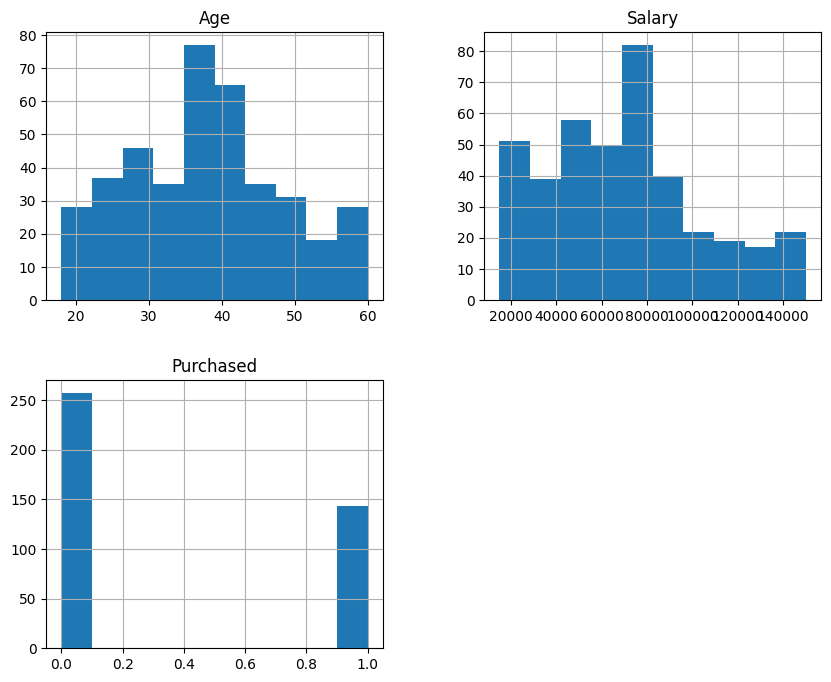

Index(['Age', 'Salary', 'Purchased'], dtype='object')


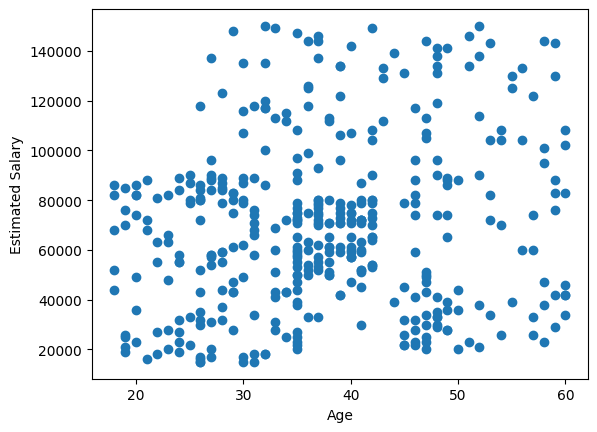

In [ ]:
print(dataset.describe())

# Histograms
dataset.hist(figsize=(10, 8))
plt.show()

# Check the column names in your dataset
print(dataset.columns)

# Scatter plot - Adjust the column names if needed based on the output above
plt.scatter(dataset['Age'], dataset['Salary']) # Assuming 'Salary' is the correct column name
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

In [ ]:

#Training and Testing Data (divide the data into two part)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.25, random_state=0)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifer = RandomForestClassifier(n_estimators=100,criterion='entropy', random_state=0)
classifer.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [ ]:

y_pred = classifer.predict(X_test)

In [ ]:

from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_test, y_pred)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)*100


92.0

<ipython-input-12-d9459dd169bb>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


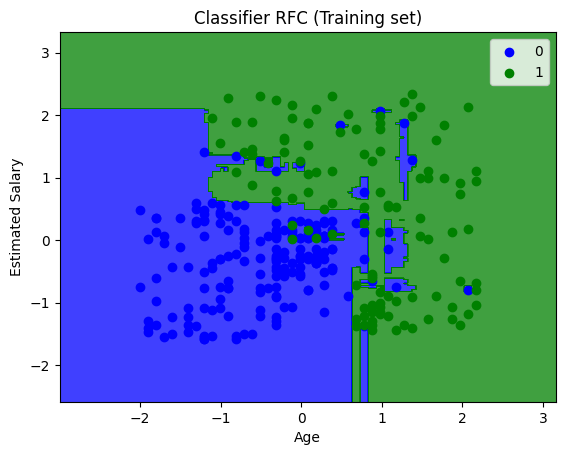

In [ ]:

# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifer.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('blue', 'green'))(i), label = j)
plt.title('Classifier RFC (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

<ipython-input-14-83f19bb292ba>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


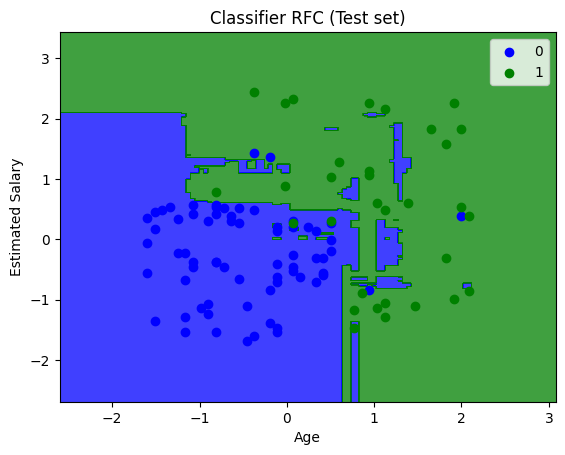

In [ ]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifer.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('blue', 'green'))(i), label = j)
plt.title('Classifier RFC (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()